In [96]:
import os
import sys
import subprocess
from pathlib import Path

repo_root = subprocess.run(
    ["git", "rev-parse", "--show-toplevel"], capture_output=True, text=True
).stdout.strip()

sys.path.append(repo_root)

In [97]:
import numpy as np

import matplotlib.pyplot as plt

from utils import helpers, halo
import lattice_ICs

In [98]:
helpers.set_plot_configs()

In [99]:
import importlib
importlib.reload(lattice_ICs)
importlib.reload(halo)

<module 'utils.halo' from '/Users/vinhtran/Data/Research/Mark/Arepo2/arepo2_scattering_tests/utils/halo.py'>

In [100]:
ICs = lattice_ICs.SphereICs(
    bg_size=1, bg_density=100**3,
    sph_radius=0.1, sph_N_part=10000, sph_veloc=1.0,
)
ICs.write('lattice_sphere_ICs.hdf5')

In [101]:
ICs.part_coords

array([[-0.12545988,  0.45071431,  0.23199394],
       [ 0.09865848, -0.34398136, -0.34400548],
       [-0.44191639,  0.36617615,  0.10111501],
       ...,
       [ 0.03759798, -0.04913504, -0.32286386],
       [-0.00996876,  0.0479851 , -0.45407573],
       [ 0.02177228,  0.07367809, -0.33795936]])

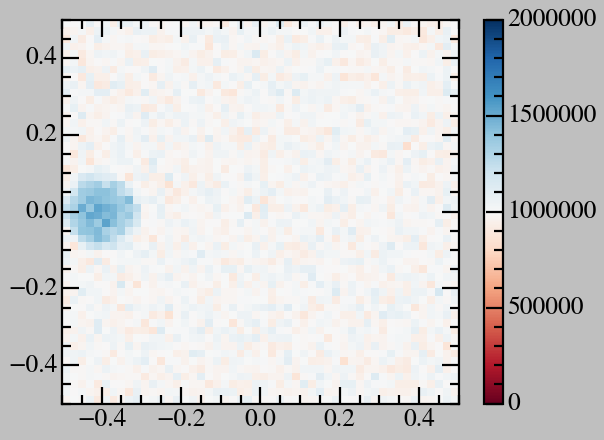

In [105]:
halo_projection = halo.HaloProjection(
    halo_file = 'lattice_sphere_ICs.hdf5',
)

fig, ax = plt.subplots(figsize = (8,6))
halo_projection.show_2d_projection(
    fig=fig, ax=ax, 
    box_size=1, num_bins=51,
    axis=1,
    log_scale=False,
    vmin=0, vmax=2*100**3
)